In [44]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#PreProcessamento de Dados
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import re
from collections import Counter
from wordcloud import WordCloud

#Machine Learning
from sklearn.preprocessing import LabelEncoder



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [24]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/trabalho-final-AM/dataset/enron_spam_data.csv")
data.sample(5)

,Message ID,Subject,Message,Spam/Ham,Date
23335,23335,salary increase for logistics scheduler,"hector , this is to verify our conversation re...",ham,2000-10-03
10922,10922,we have been rated as # 1 one - stop - shop in...,get prescription medicine for less !\nreligion...,spam,2005-07-19
3698,3698,weekend entertainment,"alpha male plus , the only multiple orgasm sup...",spam,2003-12-28
7335,7335,re : interview with the enron research group -...,mark :\ngood to hear from you ! i think it is ...,ham,2000-10-20
11528,11528,reminder of my vacation,"louise ,\ni would like to remind you of my tak...",ham,2001-04-19


# Limpeza dos dados e Análise

In [25]:
#Verificar as colunas
print("Colunas do DataFrame:")
print(data.columns)

Colunas do DataFrame:
Index(['Message ID', 'Subject', 'Message', 'Spam/Ham', 'Date'], dtype='object')


In [26]:
#Análise inicial e limpeza dos dados
data.shape

(33716, 5)

In [27]:
data.drop(columns=["Message ID", "Subject", "Date"], inplace=True)
#data.rename(columns={'v1': 'resultado', 'v2': 'emails'}, inplace=True)
data.head(5)


,Message,Spam/Ham
0,NaN,ham
1,"gary , production from the high island larger ...",ham
2,- calpine daily gas nomination 1 . doc,ham
3,fyi - see note below - already done .\nstella\...,ham
4,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham


In [28]:
data.isnull().sum()

,0
Message,371
Spam/Ham,0


In [29]:
data.duplicated().sum()

3934

In [30]:
data = data.drop_duplicates(keep='first')

In [31]:
data.shape

(29782, 2)

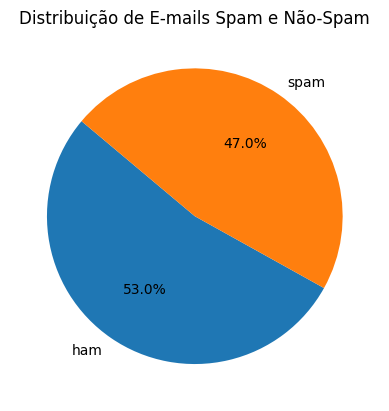

In [32]:
#Distribuição de Rótulos
data['Spam/Ham'].value_counts()

#Plotting
plt.figure()
plt.pie(data['Spam/Ham'].value_counts(), labels=data['Spam/Ham'].value_counts().index, autopct='%1.1f%%', startangle=140)
plt.title('Distribuição de E-mails Spam e Não-Spam')
#plt.axis('equal')
plt.show()

In [33]:
#Calculo da média do comprimento dos e-mails para spam e não spam

data['Comprimento'] = data['Message'].astype(str).apply(len)
data['num_palavras'] = data['Message'].astype(str).apply(word_tokenize).apply(len)
data['num_frases'] = data['Message'].astype(str).apply(sent_tokenize).apply(len)


In [34]:
data.head()

,Message,Spam/Ham,Comprimento,num_palavras,num_frases
0,NaN,ham,3,1,1
1,"gary , production from the high island larger ...",ham,4282,1572,23
2,- calpine daily gas nomination 1 . doc,ham,38,8,2
3,fyi - see note below - already done .\nstella\...,ham,1171,344,7
4,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1124,318,8


# **A média do comprimento dos E-mails SPAM e NÃO SPAM**

A média do comprimento dos E-mails SPAM: 1307.9853445810695
A média do comprimento dos E-mails Não SPAM: 1603.0676206154235


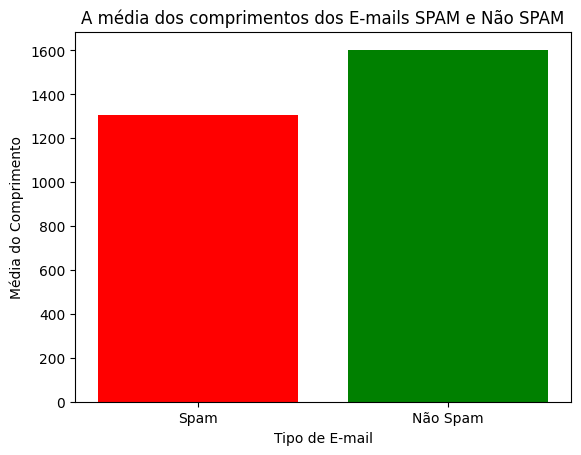

In [35]:
avg_length_spam = data[data['Spam/Ham'] == 'spam']['Comprimento'].mean()
avg_length_NaoSpam = data[data['Spam/Ham'] == 'ham']['Comprimento'].mean()
print("A média do comprimento dos E-mails SPAM:", avg_length_spam)
print("A média do comprimento dos E-mails Não SPAM:", avg_length_NaoSpam)

#Gráfico
plt.bar(['Spam', 'Não Spam'], [avg_length_spam, avg_length_NaoSpam], color=['red', 'green'])
plt.title('A média dos comprimentos dos E-mails SPAM e Não SPAM')
plt.xlabel('Tipo de E-mail')
plt.ylabel('Média do Comprimento')
plt.show()

# **Média de palavras para e-mails SPAM e NÃO SPAM**

Média das palavras de E-mais SPAM: 260.53517300543325
Média das palavras de E-mails NÃO SPAM: 342.19222489552993


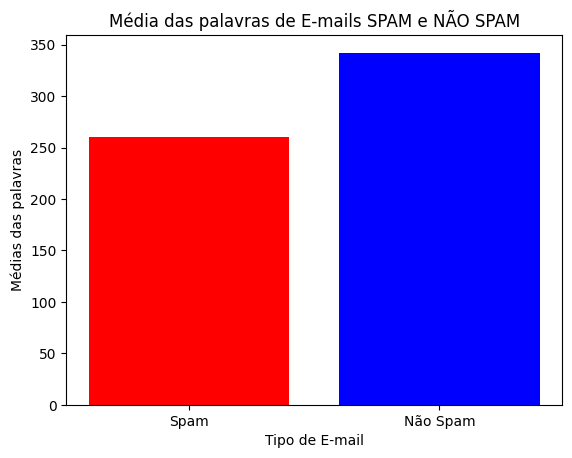

In [36]:
#Calcular a média de palavras para e-mails SPAM e NÃO SPAM
avg_word_spam = data[data['Spam/Ham'] == 'spam']['num_palavras'].mean()
avg_word_NaoSpam = data[data['Spam/Ham'] == 'ham']['num_palavras'].mean()

#Mostrar as Médias
print("Média das palavras de E-mais SPAM:", avg_word_spam)
print("Média das palavras de E-mails NÃO SPAM:", avg_word_NaoSpam)

#Gráfico
plt.bar(['Spam', 'Não Spam'], [avg_word_spam, avg_word_NaoSpam], color=['red','blue'])
plt.title('Média das palavras de E-mails SPAM e NÃO SPAM')
plt.xlabel('Tipo de E-mail')
plt.ylabel('Médias das palavras')
plt.show()

# **Média de frases em e-mails SPAM e NÃO SPAM**

A média da frase em E-mails SPAM: 18.111667143265656
A média da frase em E-mails NÃO SPAM: 18.86735469165506


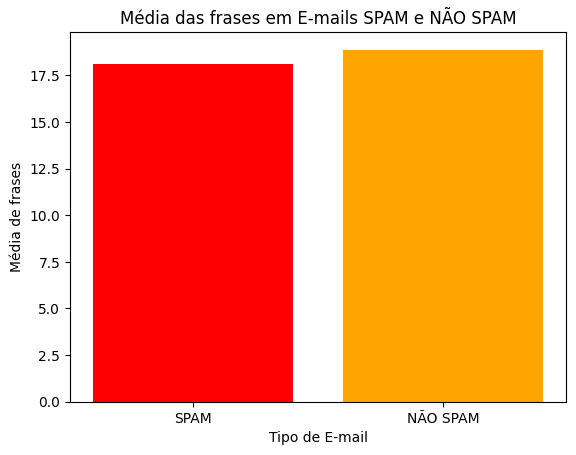

In [37]:
#Média de frases em e-mails SPAM e NÃO SPAM
avg_sentence_spam = data[data['Spam/Ham'] == 'spam']['num_frases'].mean()
avg_sentence_NaoSpam = data[data['Spam/Ham'] == 'ham']['num_frases'].mean()
print("A média da frase em E-mails SPAM:", avg_sentence_spam)
print("A média da frase em E-mails NÃO SPAM:", avg_sentence_NaoSpam)

#Gráfico
plt.bar(['SPAM', 'NÃO SPAM'], [avg_sentence_spam, avg_sentence_NaoSpam], color=['red','orange'])
plt.title('Média das frases em E-mails SPAM e NÃO SPAM')
plt.xlabel('Tipo de E-mail')
plt.ylabel('Média de frases')
plt.show()

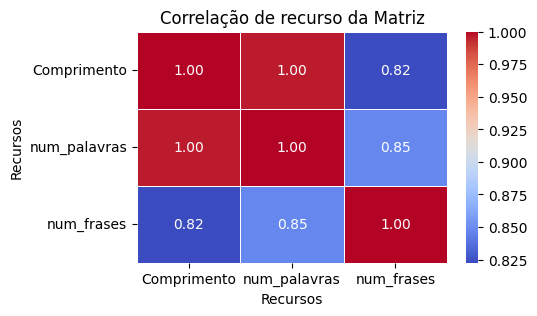

In [39]:
#Visualizar a correlação entre matriz usando a mapa de calor
plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlação de recurso da Matriz')
plt.xlabel('Recursos')
plt.ylabel('Recursos')
plt.show()

In [45]:
#Conveter todo o texto na coluna "Emails" para minúsculas
data['transformar_texto'] = data['Message'].str.lower()

#Dividir o texto em palavras
data['transformar_texto'] = data['transformar_texto'].astype(str).apply(word_tokenize)

#Remover caracteres especiais
data['transformar_texto'] = data['transformar_texto'].apply(lambda x: [re.sub(r'[^a-zA-Z0-9\s]', '', word) for word in x])

#Remover palavras comuns e sinais de pontuação
stop_words = set(stopwords.words('english'))
data['transformar_texto'] = data['transformar_texto'].apply(lambda x: [word for word in x if word not in stop_words and word not in string.punctuation])

#Aplicar Stemming (Reduz as palavras às suas raízes)
ps = PorterStemmer()
data['transformar_texto'] = data['transformar_texto'].apply(lambda x: [ps.stem(word) for word in x])

#Converter o texto pré-processado de volta para String - Junta as palavras processadasde volta em uma única string
data['transformar_texto'] = data['transformar_texto'].apply(lambda x: ' '.join(x))

#Mostrar os dados pré-processados
print(data[['Message', 'transformar_texto']].head())



                                             Message  \
0                                                NaN   
1  gary , production from the high island larger ...   
2             - calpine daily gas nomination 1 . doc   
3  fyi - see note below - already done .\nstella\...   
4  fyi .\n- - - - - - - - - - - - - - - - - - - -...   

                                   transformar_texto  
0                                                nan  
1  gari product high island larger block 1 2 comm...  
2                        calpin daili ga nomin 1 doc  
3  fyi see note alreadi done stella forward stell...  
4  fyi forward lauri allen hou ect 12 14 99 12 17...  


In [46]:
#Filtrar e-mails de spam e tokenizar o texto
spam_emails = data[data['Spam/Ham'] == 'spam']['transformar_texto']

#Tokenize the text in spam emails
spam_words = ' '.join(spam_emails).split()

#Contar as ocorrências de cada palavra
word_counts = Counter(spam_words)

#Encontrando as palavras mais comuns
most_common_words = word_counts.most_common(10)

print("Top 10 palavras mais comuns em E-mails Spam:")
for word, count in most_common_words:
    print(f"{word}: {count} occurrences")

Top 10 palavras mais comuns em E-mails Spam:
compani: 11581 occurrences
com: 9718 occurrences
1: 7748 occurrences
3: 7440 occurrences
2: 7414 occurrences
http: 7394 occurrences
e: 7328 occurrences
inform: 7151 occurrences
email: 7134 occurrences
pleas: 6405 occurrences


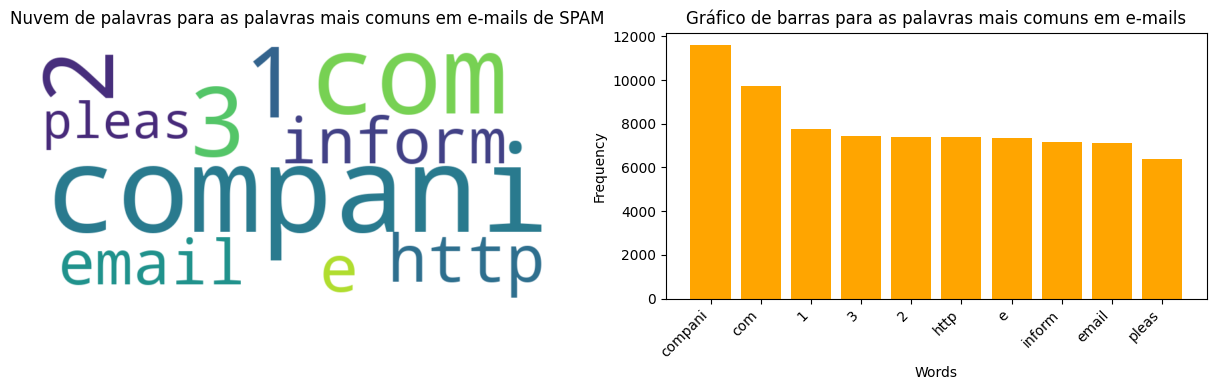

In [47]:
#Nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words))

#Nuvem de palavras do enredo
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nuvem de palavras para as palavras mais comuns em e-mails de SPAM')
plt.axis('off')

#Gráfico de barras de plotagem
plt.subplot(1, 2, 2)
words, counts = zip(*most_common_words)
plt.bar(words, counts, color='orange')
plt.title('Gráfico de barras para as palavras mais comuns em e-mails')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [48]:
NaoSpam_emails = data[data['Spam/Ham'] == 'ham']['transformar_texto']
#Tokenize o texto em e-mails de Não SPAM
NaoSpam_words = ' '.join(NaoSpam_emails).split()
#Contando as ocorrências de cada palavra
word_counts = Counter(NaoSpam_words)
#Encontrar as palavras mais comuns
most_common_words = word_counts.most_common(10)

print("Top 10 palavras mais comuns em E-mails Não Spam:")
for word, count in most_common_words:
    print(f"{word}: {count} occurrences")

Top 10 palavras mais comuns em E-mails Não Spam:
enron: 52835 occurrences
ect: 34715 occurrences
hou: 16658 occurrences
2001: 13834 occurrences
pleas: 12671 occurrences
2000: 12179 occurrences
1: 11886 occurrences
compani: 11864 occurrences
com: 11844 occurrences
subject: 11801 occurrences


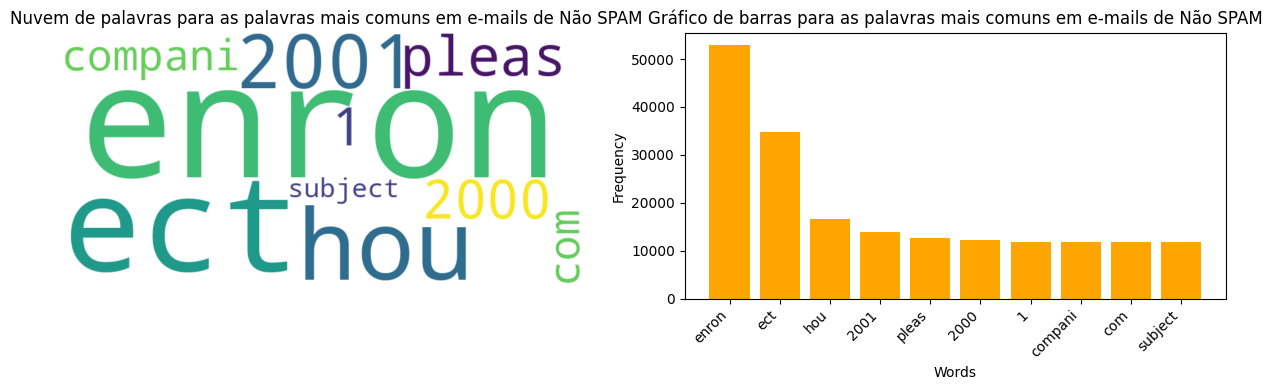

In [49]:
#Gerar nuvem de palavras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_words))

# Plot Word Cloud
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Nuvem de palavras para as palavras mais comuns em e-mails de Não SPAM')
plt.axis('off')

# Plot Bar Graph
plt.subplot(1, 2, 2)
words, counts = zip(*most_common_words)
plt.bar(words, counts, color='orange')
plt.title('Gráfico de barras para as palavras mais comuns em e-mails de Não SPAM')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()